In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import zero_one_loss

In [33]:
n_estimators = 500
learning_rate = 1
X,y = datasets.make_hastie_10_2(n_samples=12000,random_state=1)#使用make_hastie_10_2数据集
X_test,y_test=X[2000:],y[2000:]
X_train,y_train=X[:2000],y[:2000]

dt_stump = DecisionTreeClassifier(max_depth=1,min_samples_leaf=1)
dt_stump.fit(X_train,y_train)
dt_stump_err = 1.0-dt_stump.score(X_test,y_test)#利用测试集去评分

dt = DecisionTreeClassifier(max_depth=9,min_samples_leaf=1)
dt.fit(X_train,y_train)
dt_err = 1.0-dt.score(X_test,y_test)

fig = plt.figure()
ax=fig.add_subplot(111)
ax.plot([1,n_estimators],[dt_stump_err]*2,'k-',label='Decision Stump Error')
ax.plot([1,n_estimators],[dt_err]*2,'k--',label='Decision Tree Error') #画水平直线的方法


In [34]:
ada_discrete = AdaBoostClassifier(base_estimator=dt_stump, learning_rate=learning_rate,n_estimators=n_estimators,algorithm='SAMME')
ada_discrete.fit(X_train, y_train)

ada_real = AdaBoostClassifier(base_estimator=dt_stump, learning_rate=learning_rate,n_estimators=n_estimators,algorithm='SAMME.R')
ada_real.fit(X_train, y_train)


AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
          learning_rate=1, n_estimators=500, random_state=None)

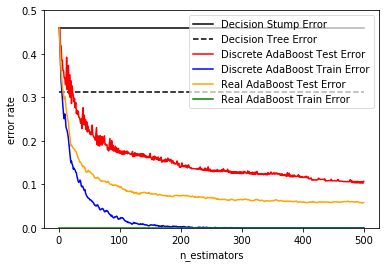

In [35]:
ada_discrete_err=np.zeros((n_estimators,))
for i,y_pred in enumerate(ada_discrete.staged_predict(X_test)):
    ada_discrete_err[i]=zero_one_loss(y_pred,y_test)    ######zero_one_loss
ada_discrete_err_train=np.zeros((n_estimators,))
for i,y_pred in enumerate(ada_discrete.staged_predict(X_train)):
    ada_discrete_err_train[i]=zero_one_loss(y_pred,y_train)
#zero_one_loss:If normalize is True(default), return the fraction of misclassifications (float), 
#else it returns the number of misclassifications (int). The best performance is 0.
 
ada_real_err=np.zeros((n_estimators,))
for i,y_pred in enumerate(ada_real.staged_predict(X_test)):
    ada_real_err[i]=zero_one_loss(y_pred,y_test)
ada_real_err_train=np.zeros((n_estimators,))
for i,y_pred in enumerate(ada_real.staged_predict(X_train)):
    ada_discrete_err_train[i]=zero_one_loss(y_pred,y_train)
 
ax.plot(np.arange(n_estimators)+1,ada_discrete_err,label='Discrete AdaBoost Test Error',color='red')
ax.plot(np.arange(n_estimators)+1,ada_discrete_err_train,label='Discrete AdaBoost Train Error',color='blue')
ax.plot(np.arange(n_estimators)+1,ada_real_err,label='Real AdaBoost Test Error',color='orange')
ax.plot(np.arange(n_estimators)+1,ada_real_err_train,label='Real AdaBoost Train Error',color='green')

ax.set_ylim(0.0,0.5)
ax.set_xlabel('n_estimators')
ax.set_ylabel('error rate')
ax.legend(loc='upper right',fancybox=True).get_frame().set_alpha(0.7)

plt.show()